In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score
from sklearn.model_selection import cross_val_score

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# Dataset from https://www.kaggle.com/jessemostipak/hotel-booking-demand

df = pd.read_csv('./Data/hotel_bookings.csv')
#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/hotel_bookings.csv')

In [3]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
df = df.drop(['arrival_date_week_number', 'agent', 'company','reservation_status_date'], axis = 1)

In [7]:
df.children = df.children.fillna(0)
df.country = df.country.fillna(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119390 non-null  float64
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  object 
 12  country         

In [9]:
df = pd.get_dummies(df)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Columns: 259 entries, is_canceled to reservation_status_No-Show
dtypes: float64(2), int64(15), uint8(242)
memory usage: 43.0 MB


# Cancellation Rate

# Creating df4 with only relevant columns for prediction of cancellation

As seen in "Hotel_Cancellation_Feature_Correlations" only "country_PRT" plays a role in cancellation rate and thus is kept here.

In [11]:
selected_cols = ('market_segment', 'distribution_channel', 'deposit_type', 'hotel')
filter_cols = [col for col in df if col.startswith(selected_cols)]
df4 = df[['is_canceled', 'lead_time', 'previous_cancellations', 'required_car_parking_spaces', 'total_of_special_requests', 'country_PRT']]
df5 = df[filter_cols]
df4 = pd.concat([df4, df5], axis = 1)

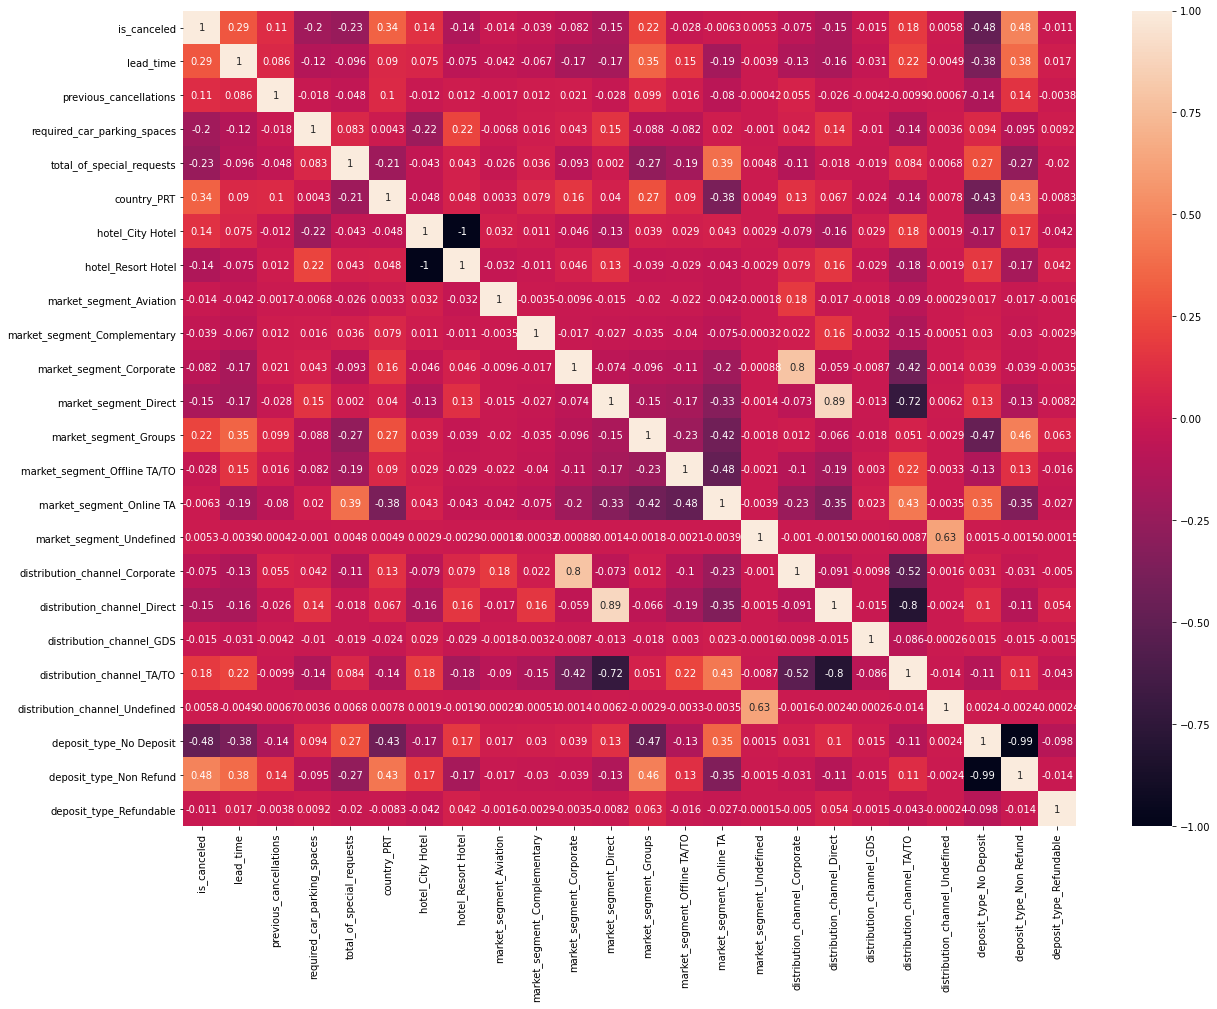

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15)) 
sns.heatmap(df4.corr(), annot=True, ax = ax)

# Cancellation prediction - all data (df) but without reservation_status

In [18]:
X = df.drop(['is_canceled', 'reservation_status_Canceled', 'reservation_status_Check-Out', 'reservation_status_No-Show'], axis = 1)
y = df['is_canceled']
y = np.array(y)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [29]:
# Normalization

X_norm = MinMaxScaler().fit(X_train)
X_train_norm = X_norm.transform(X_train)
X_test_norm = X_norm.transform(X_test)

# Logistic Regression

In [30]:
model_lr = LogisticRegression().fit(X_train_norm, y_train)
model_lr_prediction = model_lr.predict(X_test_norm)
version_lr = accuracy_score(y_test, model_lr_prediction)
version_lr

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8141804171203618

In [31]:
kappa_lr = cohen_kappa_score(y_test, model_lr_prediction)
kappa_lr

0.5861403550041657

Feature importance

Feature: 0, Score: 4.58609
Feature: 1, Score: 0.37136
Feature: 2, Score: -0.02157
Feature: 3, Score: 1.50078
Feature: 4, Score: 3.52484
Feature: 5, Score: 3.39220
Feature: 6, Score: 1.88716
Feature: 7, Score: 0.15431
Feature: 8, Score: -0.72063
Feature: 9, Score: 10.30004
Feature: 10, Score: -3.13228
Feature: 11, Score: -7.89042
Feature: 12, Score: -1.15453
Feature: 13, Score: 2.65795
Feature: 14, Score: -23.08953
Feature: 15, Score: -3.85718
Feature: 16, Score: -0.12093
Feature: 17, Score: -0.30939
Feature: 18, Score: 0.06048
Feature: 19, Score: -0.20257
Feature: 20, Score: 0.19521
Feature: 21, Score: 0.08872
Feature: 22, Score: -0.16761
Feature: 23, Score: -0.32624
Feature: 24, Score: -0.19410
Feature: 25, Score: -0.11457
Feature: 26, Score: -0.04564
Feature: 27, Score: 0.14702
Feature: 28, Score: 0.21161
Feature: 29, Score: -0.08264
Feature: 30, Score: -0.01848
Feature: 31, Score: 0.33705
Feature: 32, Score: -0.22850
Feature: 33, Score: 0.13812
Feature: 34, Score: -0.65851
Feature: 

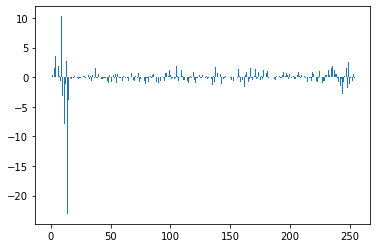

In [32]:
# Get importance
importance = model_lr.coef_[0]

# Summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [33]:
df.iloc[:,14]

0           0.00
1           0.00
2          75.00
3          75.00
4          98.00
           ...  
119385     96.14
119386    225.43
119387    157.71
119388    104.40
119389    151.20
Name: adr, Length: 119390, dtype: float64

# Decision Tree

In [34]:
model_dt = tree.DecisionTreeClassifier().fit(X_train_norm, y_train)
model_dt_prediction = model_dt.predict(X_test_norm)
version_dt = accuracy_score(y_test, model_dt_prediction)
version_dt

0.8513694614289304

Kappa

In [35]:
kappa_dt = cohen_kappa_score(y_test, model_dt_prediction)
kappa_dt

0.6818182654448313

Feature importance

Feature: 0, Score: 0.12074
Feature: 1, Score: 0.02992
Feature: 2, Score: 0.05444
Feature: 3, Score: 0.01748
Feature: 4, Score: 0.02964
Feature: 5, Score: 0.01036
Feature: 6, Score: 0.00431
Feature: 7, Score: 0.00071
Feature: 8, Score: 0.00046
Feature: 9, Score: 0.02081
Feature: 10, Score: 0.00580
Feature: 11, Score: 0.01565
Feature: 12, Score: 0.00130
Feature: 13, Score: 0.08012
Feature: 14, Score: 0.02325
Feature: 15, Score: 0.05443
Feature: 16, Score: 0.00437
Feature: 17, Score: 0.00515
Feature: 18, Score: 0.00399
Feature: 19, Score: 0.00736
Feature: 20, Score: 0.00319
Feature: 21, Score: 0.00309
Feature: 22, Score: 0.00281
Feature: 23, Score: 0.00496
Feature: 24, Score: 0.00418
Feature: 25, Score: 0.00360
Feature: 26, Score: 0.00518
Feature: 27, Score: 0.00311
Feature: 28, Score: 0.00368
Feature: 29, Score: 0.00322
Feature: 30, Score: 0.00446
Feature: 31, Score: 0.00100
Feature: 32, Score: 0.00329
Feature: 33, Score: 0.00273
Feature: 34, Score: 0.00057
Feature: 35, Score: 0.00012
Fe

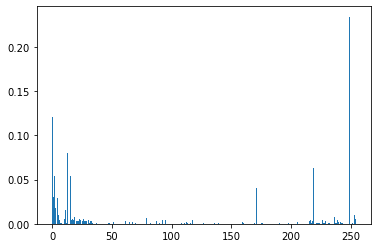

In [36]:
# get importance

importance = model_dt.feature_importances_

# summarize feature importance

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance

plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [37]:
X.iloc[:,0].head(1)

0    342
Name: lead_time, dtype: int64

In [38]:
X.iloc[:,249].head(1)

0    0
Name: deposit_type_Non Refund, dtype: uint8

# K-Fold Decision Tree

Maximum:  0.9698492462311558
Mean:  0.8119071166795949


<AxesSubplot:>

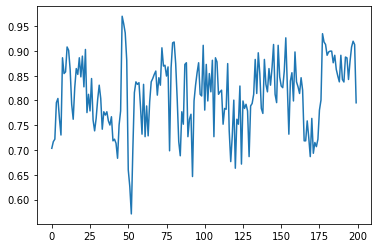

In [39]:
dt_plot_DV = cross_val_score(tree.DecisionTreeClassifier(max_depth =8), X, y, cv=200)   # Best result with max_depth =8), X, y, cv=200
print('Maximum: ', dt_plot_DV.max())
print('Mean: ', dt_plot_DV.mean())
dt_plot_DV = pd.Series(dt_plot_DV)
dt_plot_DV.plot()

In [40]:
# KNN
model_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2).fit(X_train, y_train)
model_knn_prediction = model_knn.predict(X_test)
version_knn = accuracy_score(y_test, model_knn_prediction)
version_knn

0.7725521400452299

In [41]:
kappa_knn = cohen_kappa_score(y_test, model_knn_prediction)
kappa_knn

0.5025934168866507

In [ ]:
# Random Forest
model_rf = RandomForestClassifier(n_estimators=800).fit(X_train, y_train)
model_rf_prediction = model_rf.predict(X_test)
version_rf = accuracy_score(y_test, model_rf_prediction)
version_rf

0.8913225563280006

In [ ]:
kappa_rf = cohen_kappa_score(y_test, model_rf_prediction)
kappa_rf

0.761949429146883

Feature: 0, Score: 0.11472
Feature: 1, Score: 0.02394
Feature: 2, Score: 0.06015
Feature: 3, Score: 0.02607
Feature: 4, Score: 0.03989
Feature: 5, Score: 0.01441
Feature: 6, Score: 0.00665
Feature: 7, Score: 0.00092
Feature: 8, Score: 0.00246
Feature: 9, Score: 0.02985
Feature: 10, Score: 0.00438
Feature: 11, Score: 0.01913
Feature: 12, Score: 0.00348
Feature: 13, Score: 0.07725
Feature: 14, Score: 0.02065
Feature: 15, Score: 0.05419
Feature: 16, Score: 0.00714
Feature: 17, Score: 0.00696
Feature: 18, Score: 0.00578
Feature: 19, Score: 0.00700
Feature: 20, Score: 0.00411
Feature: 21, Score: 0.00467
Feature: 22, Score: 0.00369
Feature: 23, Score: 0.00705
Feature: 24, Score: 0.00587
Feature: 25, Score: 0.00525
Feature: 26, Score: 0.00621
Feature: 27, Score: 0.00385
Feature: 28, Score: 0.00536
Feature: 29, Score: 0.00467
Feature: 30, Score: 0.00683
Feature: 31, Score: 0.00094
Feature: 32, Score: 0.00498
Feature: 33, Score: 0.00373
Feature: 34, Score: 0.00102
Feature: 35, Score: 0.00033
Fe

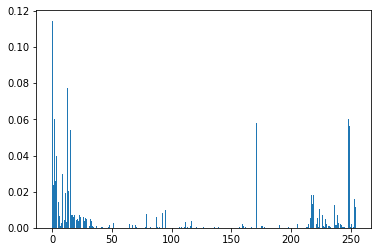

In [ ]:
# get importance
importance = model_rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()